## CREDIT CARD FRAUD DETECTION SYSTEM

For any bank or financial organization, credit card fraud detection is of utmost importance. We have to spot potential fraud so that consumers can not bill for goods that they haven’t purchased. The aim is, therefore, to create a classifier that indicates whether a requested transaction is a fraud.

In [ ]:
# importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


In [ ]:
# importing the dataset.
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# checking for null values
df.isnull().values.any()

# there are no null values present in the dataset

False

In [ ]:
# a summary of the"Amount" column
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

 This describes total attributes in the "Amount" column. It also shows the total transactions in the dataset which is (284807).

In [ ]:
# this provides info about the dataset, which includes the column count, non-null count and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the total amount of fradulent and non-fradulent data
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Using Matplotlib to check the number of occurences of each class model
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


 From the results, it shows that only 492(0.173%) of the total data is fradulent which isn't accurate as it shows an inbalance in the data with respect to the target variable class. 

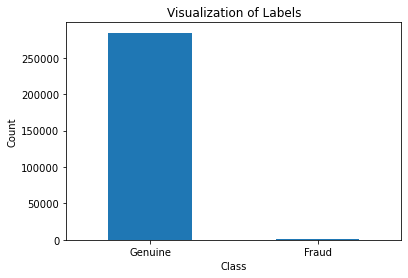

In [ ]:
# Using matplotlib to plot the information above
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

 From the information above, we can see that 99% of the transactions are not fradulent which isn't good. We will apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = df["Class"]
X = df.drop(["Class"], axis= 1)

##### Now, it’s time to split credit card data with a split of 70-30 using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


 In this project we will train different models and observe which model works best for our problem. We can apply a variety of algorithms for this problem like Random Forest, Decision Tree, Support Vector Machine. In this machine learning project, we build Random Forest and Decision Tree classifiers and see which one works best. We will address the “class imbalance” problem by picking the best-performing model. But before we start we have to understand what Decision Tree and Random Forest classifers are. 
 The Decision Tree algorithm is a supervised machine learning algorithm used for classification and regression tasks. The algorithm’s aim is to build a training model that predicts the value of a target class variable by learning simple if-then-else decision rules inferred from the training data. While Random forest (one of the most popular algorithms) is a supervised machine learning algorithm. It creates a “forest” out of an ensemble of “decision trees”, which are normally trained using the “bagging” technique. The bagging method’s basic principle is that combining different learning models improves the outcome.

In [ ]:
# buildng the Decision Tree and Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)


In [ ]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)


Random Forest Score:  99.9637185023934
Decision Tree Score:  99.91222218320986


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, ConfusionMatrixDisplay


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))


In [ ]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85260    47]
 [   28   108]]


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

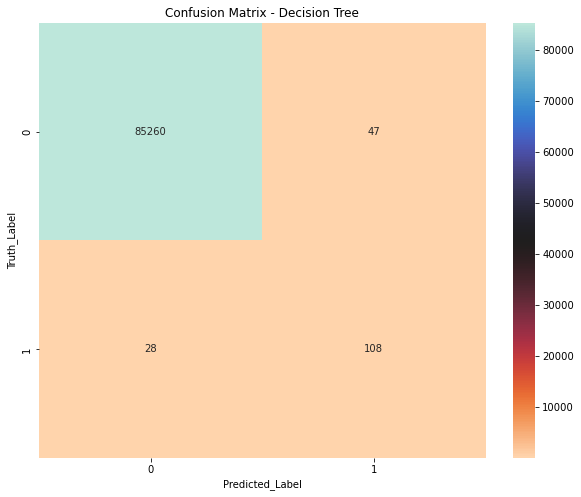

In [ ]:
from sklearn.metrics import confusion_matrix
cm_plot = confusion_matrix(test_Y, predictions_dt)
cm_plot
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour.
sn.heatmap(cm_plot, annot=True, cmap= 'icefire_r',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Decision Tree')

In [ ]:
# evaluation of our Decision Tree model
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99912
Precision: 0.69677
Recall: 0.79412
F1-score: 0.74227


In [ ]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest
[[85301     6]
 [   25   111]]


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

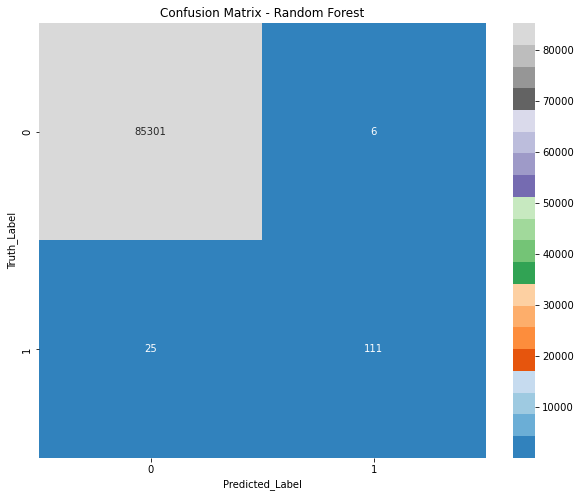

In [ ]:
# plotting the confusion matrix of our Random Forest classifier
from sklearn.metrics import confusion_matrix
cm_plot = confusion_matrix(test_Y, predictions_rf)
cm_plot
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour.
sn.heatmap(cm_plot, annot=True, cmap= 'tab20c',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest')

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99964
Precision: 0.94872
Recall: 0.81618
F1-score: 0.87747


### Addressing the Class-Imbalance issue.
The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.17%. 

With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. Oversampling is one of them.

Oversample the minority class is one of the approaches to address the imbalance in the dataset. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a method of data augmentation for the minority class.

The above SMOTE is present in the imblearn package. Let’s import that and resample our data.

In the following code below, we resampled our data and we split it using train_test_split() with a split of 70-30.

In [ ]:
# installing imblearn on the notebook
!pip3 install imblearn

In [ ]:
# performing oversampling on RF and DT

from imblearn.over_sampling import SMOTE


X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


As the Random Forest algorithm performed better than the Decision Tree algorithm, we will apply the Random Forest algorithm to our resampled data.

In [ ]:
# we use the Random Forest algorithm since it performed better than the Decision Tree algorithm
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100


In [ ]:
# visizualiztions using confusion matrix
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)



Confusion Matrix - Random Forest
[[85131    18]
 [    0 85440]]


Text(0.5, 1.0, 'Confusion Matrix - Random Forest After Oversampling')

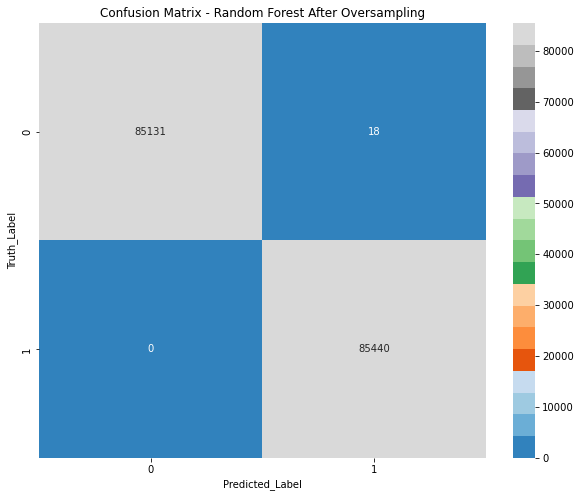

In [ ]:
# plotting the confusion matrix of our Random Forest After Oversampling 
from sklearn.metrics import confusion_matrix
cm_plot = confusion_matrix(test_Y, predictions_resampled)
cm_plot
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour.
sn.heatmap(cm_plot, annot=True, cmap= 'tab20c',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest After Oversampling')

In [ ]:
print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99989
Precision: 0.99979
Recall: 1.00000
F1-score: 0.99989


Now, it is clearly evident that our model performed much better than our previous Random Forest classifier without oversampling.

### Summary


 We built a binary classifier using the Random Forest algorithm to detect credit card fraud transactions in this python project. Through this project, we understood and applied techniques to address the class imbalance issues in the dataset and achieved an accuracy of more than 99% in our result.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=459644e2-512b-4c7d-a7ec-c031a5a50751' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>